CICIDS2017数据集包含良性和最新的常见攻击，类似于真实的真实数据（PCAP）。它还包括使CICFlowMeter 和基于时间戳、源和目标 IP、源和目标端口、协议和攻击（CSV 文件）标记流的网络流量分析结果。还可以使用提取的特征定义。
- Dataset Info: https://www.unb.ca/cic/datasets/ids-2017.html
- Dataset Link: http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/MachineLearningCSV.zip

# Download data




In [1]:
!wget http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/MachineLearningCSV.zip
!unzip -q MachineLearningCSV.zip

'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'unzip' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [2]:
123

123

# EDA
- Exploratory Data Analysis
-  https://zhuanlan.zhihu.com/p/115741410
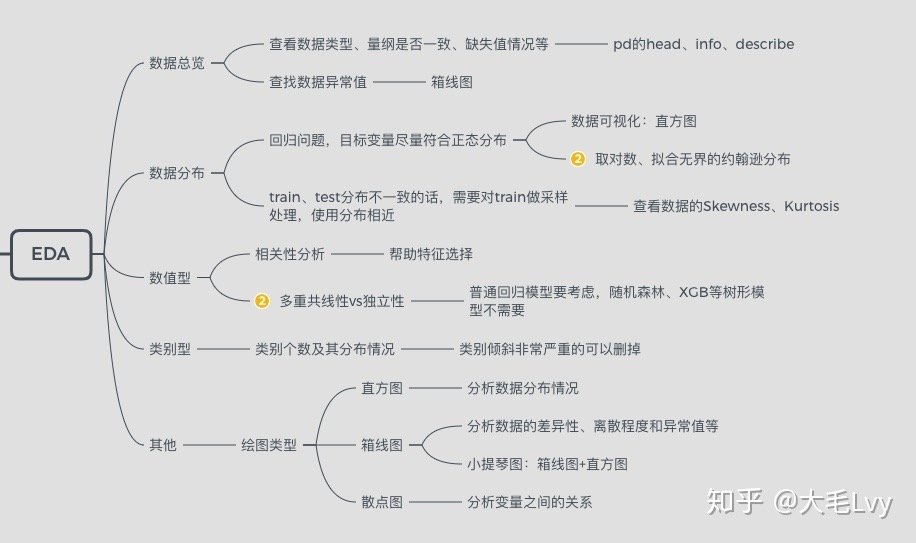

In [3]:
import os
import glob
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# get data file names
path =r'./MachineLearningCVE/'
filenames = glob.glob(path + "*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, keep_default_na=True))
data_df = pd.concat(dfs)

print(data_df[' Label'].value_counts())

In [ ]:
data_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.000000e+06,666666.666700,3.000000,0.000000,3,3,3,3.000000,0.000000,3,3,0,0.000000,0.000000,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,1.100917e+05,18348.623850,109.000000,0.000000,109,109,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,2.307692e+05,38461.538460,52.000000,0.000000,52,52,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.529412e+05,58823.529410,34.000000,0.000000,34,34,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.000000e+06,666666.666700,3.000000,0.000000,3,3,3,3.000000,0.000000,3,3,0,0.000000,0.000000,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286462,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,4344,0,1856.859649,972.796621,5.464196e+05,540.444082,1867.952381,7207.469062,53438,1,196135,4086.145833,10366.095180,53521,1,172901,3087.517857,9307.416597,53438,2,0,0,0,0,1252,1832,249.827925,290.616157,0,4344,1001.607477,1160.591064,1346971.618,0,0,0,1,0,0,0,0,1,1011.056604,27.163265,1856.859649,1252,0,0,0,0,0,0,49,1331,57,105841,29200,61,31,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286463,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,2896,0,1769.372881,848.453540,2.793639e+05,285.394161,3536.672897,18326.251010,173388,0,378424,7883.833333,34491.462460,236489,2,355402,6127.620690,27253.356700,196547

In [ ]:
data_df.info

<bound method DataFrame.info of          Destination Port   Flow Duration  ...   Idle Min   Label
0                   54865               3  ...          0  BENIGN
1                   55054             109  ...          0  BENIGN
2                   55055              52  ...          0  BENIGN
3                   46236              34  ...          0  BENIGN
4                   54863               3  ...          0  BENIGN
...                   ...             ...  ...        ...     ...
286462                443          196135  ...          0  BENIGN
286463                443          378424  ...          0  BENIGN
286464                443          161800  ...          0  BENIGN
286465                443          142864  ...          0  BENIGN
286466                443          186928  ...          0  BENIGN

[2830743 rows x 79 columns]>

In [ ]:
data_df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,2.105286e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.26305

In [ ]:
f , ax = plt.subplots(figsize = (20, 10))
(data_df[' Label'].value_counts()).plot.bar()

: 

In [ ]:
print((data_df[' Label'].value_counts()/data_df.shape[0])*100)

BENIGN                        80.300366
DoS Hulk                       8.162981
PortScan                       5.614427
DDoS                           4.522735
DoS GoldenEye                  0.363615
FTP-Patator                    0.280421
SSH-Patator                    0.208320
DoS slowloris                  0.204752
DoS Slowhttptest               0.194260
Bot                            0.069452
Web Attack � Brute Force       0.053237
Web Attack � XSS               0.023033
Infiltration                   0.001272
Web Attack � Sql Injection     0.000742
Heartbleed                     0.000389
Name:  Label, dtype: float64


In [ ]:
# Imbalance ratio
print((data_df[' Label'].value_counts()[0] ) / data_df[' Label'].value_counts())

BENIGN                             1.000000
DoS Hulk                           9.837138
PortScan                          14.302504
DDoS                              17.754825
DoS GoldenEye                    220.839114
FTP-Patator                      286.356387
SSH-Patator                      385.466678
DoS slowloris                    392.183747
DoS Slowhttptest                 413.365521
Bot                             1156.203967
Web Attack � Brute Force        1508.358991
Web Attack � XSS                3486.345092
Infiltration                   63141.583333
Web Attack � Sql Injection    108242.714286
Heartbleed                    206645.181818
Name:  Label, dtype: float64


# Data Clean

In [ ]:
# Drop NaN, Inf 
data_df = data_df.replace([np.inf, -np.inf], np.nan)

data_df = data_df.dropna()
data_df = data_df.drop_duplicates(keep='last')

: 

In [ ]:
data_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.000000e+06,666666.666700,3.000000,0.000000,3,3,3,3.000000,0.000000,3,3,0,0.000000,0.000000,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,1.100917e+05,18348.623850,109.000000,0.000000,109,109,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,2.307692e+05,38461.538460,52.000000,0.000000,52,52,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.529412e+05,58823.529410,34.000000,0.000000,34,34,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.000000e+06,666666.666700,3.000000,0.000000,3,3,3,3.000000,0.000000,3,3,0,0.000000,0.000000,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286462,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,4344,0,1856.859649,972.796621,5.464196e+05,540.444082,1867.952381,7207.469062,53438,1,196135,4086.145833,10366.095180,53521,1,172901,3087.517857,9307.416597,53438,2,0,0,0,0,1252,1832,249.827925,290.616157,0,4344,1001.607477,1160.591064,1346971.618,0,0,0,1,0,0,0,0,1,1011.056604,27.163265,1856.859649,1252,0,0,0,0,0,0,49,1331,57,105841,29200,61,31,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286463,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,2896,0,1769.372881,848.453540,2.793639e+05,285.394161,3536.672897,18326.251010,173388,0,378424,7883.833333,34491.462460,236489,2,355402,6127.620690,27253.356700,196547

In [ ]:
# Label code
label_code = {'BENIGN': 'BENIGN',
              'DoS Hulk': 'DoS',
              'PortScan': 'PortScan',
              'DDoS': 'DDoS',
              'DoS GoldenEye': 'DoS',
              'FTP-Patator': 'Patator',
              'SSH-Patator': 'Patator',
              'DoS slowloris': 'DoS',
              'DoS Slowhttptest': 'DoS',
              'Bot': 'Bot',
              'Web Attack � Brute Force': 'Web Attack',
              'Web Attack � XSS': 'Web Attack',
              'Web Attack � Sql Injection': 'Web Attack',
              'Infiltration': 'Infiltration',
              'Heartbleed': 'Heartbleed',
              }

data_df[' Label'] = [label_code[item] for item in data_df[' Label']]

print(data_df[' Label'].value_counts())

BENIGN          2095057
DoS              193745
DDoS             128014
PortScan          90694
Patator            9150
Web Attack         2143
Bot                1948
Infiltration         36
Heartbleed           11
Name:  Label, dtype: int64


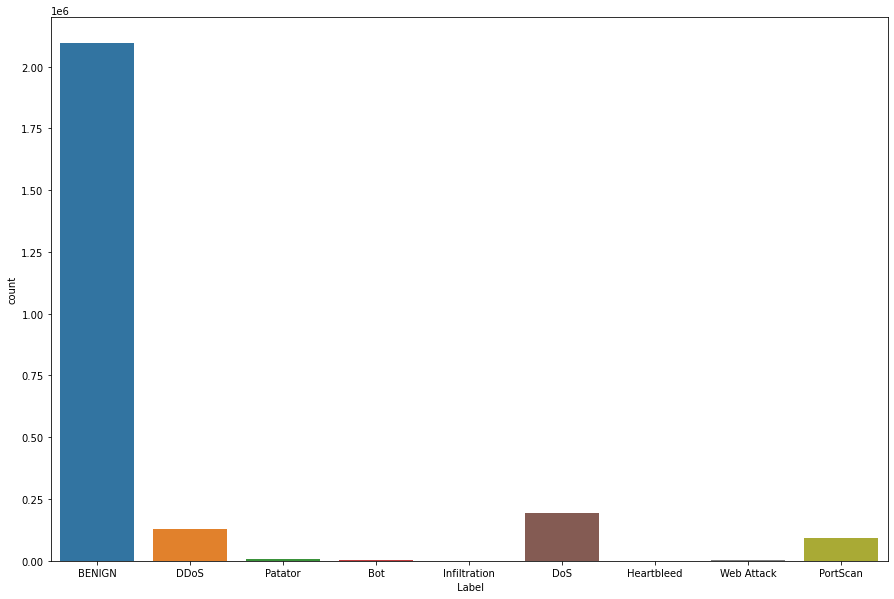

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x=' Label',data=data_df)

In [ ]:
# Imbalance ratio
print((data_df[' Label'].value_counts()[0] ) / data_df[' Label'].value_counts())

BENIGN               1.000000
DoS                 10.813476
DDoS                16.365843
PortScan            23.100282
Patator            228.967978
Web Attack         977.628091
Bot               1075.491273
Infiltration     58196.027778
Heartbleed      190459.727273
Name:  Label, dtype: float64


In [ ]:
target_names = ['BENIGN', 'DoS', 'DDoS', 'PortScan', 'Patator', 'Web Attack', 'Bot', 'Infiltration', 'Heartbleed']
# Label code
label_code = {'BENIGN': 0,
              'DoS': 1,
              'DDoS': 2,
              'PortScan': 3,
              'Patator': 4,
              'Web Attack': 5,
              'Bot': 6,
              'Infiltration': 7,
              'Heartbleed': 8,
              }

data_df[' Label'] = [label_code[item] for item in data_df[' Label']]

print(data_df[' Label'].value_counts())

0    2095057
1     193745
2     128014
3      90694
4       9150
5       2143
6       1948
7         36
8         11
Name:  Label, dtype: int64


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from collections import Counter

rn = 42
df_shuffle = shuffle(data_df, random_state=rn)

# train_test_split(80%-->train, 20%-->test)
x = df_shuffle.iloc[:,:-1]
y = df_shuffle.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y)

print('------------Train set------------------------')
print(Counter(y_train))
print('------------Test set------------------------')
print(Counter(y_test))

# Standardization
# fit x_train mean/std
scaler = preprocessing.MinMaxScaler().fit(x_train)

# Standardization transform
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
y_test = pd.DataFrame(y_test)

------------Train set------------------------
Counter({0: 1676045, 1: 154996, 2: 102411, 3: 72555, 4: 7320, 5: 1714, 6: 1559, 7: 29, 8: 9})
------------Test set------------------------
Counter({0: 419012, 1: 38749, 2: 25603, 3: 18139, 4: 1830, 5: 429, 6: 389, 7: 7, 8: 2})


In [ ]:
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score, classification_report, confusion_matrix)

# SVM

Training time: 920
Testing time: 0
Classification Report
              precision    recall  f1-score   support

      BENIGN  0.975837192 0.978776264 0.977304518    419012
         DoS  0.981748627 0.867609487 0.921156823     38749
        DDoS  0.995143685 0.872397766 0.929736930     25603
    PortScan  0.678732517 0.987209879 0.804411302     18139
     Patator  1.000000000 0.436612022 0.607835679      1830
  Web Attack  0.000000000 0.000000000 0.000000000       429
         Bot  0.428571429 0.007712082 0.015151515       389
Infiltration  0.200000000 0.142857143 0.166666667         7
  Heartbleed  0.666666667 1.000000000 0.800000000         2

    accuracy                      0.961571723    504160
   macro avg  0.658522235 0.588130516 0.580251493    504160
weighted avg  0.965405648 0.961571723 0.961425932    504160



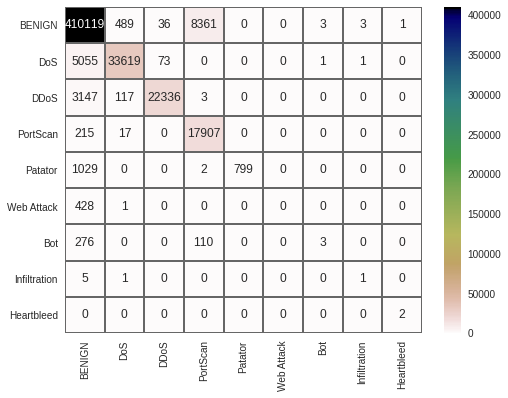

In [ ]:
# DataFrame --> Numpy
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# SVC
# fit
fit_startime = datetime.datetime.now()
model = svm.LinearSVC()
model = model.fit(x_train, y_train.ravel())
fit_endtime = datetime.datetime.now()
print('Training time:',(fit_endtime - fit_startime).seconds)

# expeced
expected = y_test.ravel()

# Testing
test_startime = datetime.datetime.now()
predicted = model.predict(x_test)
test_endtime = datetime.datetime.now()
print("Testing time:",(test_endtime - test_startime).seconds)

# Pre, Recall, F1-score 
print('Classification Report')
print(classification_report(expected, predicted, target_names = target_names, digits=9))

predicted = [np.round(x) for x in predicted]
predicted = np.array(predicted)

# confusion matrix
cm = metrics.confusion_matrix(expected, predicted)
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='0.6g',  linewidths=1 ,cmap='gist_earth_r', linecolor='#666666',
                 xticklabels=target_names, yticklabels=target_names)
plt.show()

# RandomForestClassifier

In [ ]:
# DataFrame --> Numpy
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# RandomForestClassifier
# fit
fit_startime = datetime.datetime.now()
model = RandomForestClassifier(n_estimators=200)
model = model.fit(x_train, y_train.ravel())
fit_endtime = datetime.datetime.now()
print('Training time:',(fit_endtime - fit_startime).seconds)

# expeced
expected = y_test.ravel()

# Testing
test_startime = datetime.datetime.now()
predicted = model.predict(x_test)
test_endtime = datetime.datetime.now()
print("Testing time:",(test_endtime - test_startime).seconds)

# Pre, Recall, F1-score 
print('Classification Report')
print(classification_report(expected, predicted, target_names = target_names, digits=9))


predicted = [np.round(x) for x in predicted]
predicted = np.array(predicted)

# confusion matrix
cm = metrics.confusion_matrix(expected, predicted)
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='0.6g',  linewidths=1 ,cmap='gist_earth_r', linecolor='#666666',
                 xticklabels=target_names, yticklabels=target_names)
plt.show()

# DSSTE
- Difficult Set Sampling TEchnique 困难样本抽样技术

In [ ]:
import pandas as pd
import numpy as np
import math
import random
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import EditedNearestNeighbours

def class_attribute(data, threshold, N):
    X, y = data.iloc[:,:-1], data.iloc[:,-1:]
    
    data_counter = Counter(data.iloc[:, -1])
    print(data_counter)

    vcs = y.value_counts(normalize=True)
    print(vcs)
    
    minority_cls, majority_cls = [], []
    
    for idx, vc in zip(range(len(vcs)), vcs):
        if vc <= threshold:
            minority_cls.append(list(vcs.index[idx])[0])
        else:
            majority_cls.append(list(vcs.index[idx])[0])
    print('minority_cls: {}'.format(minority_cls), 'majority_cls: {}'.format(majority_cls))
    
    cc_value = []
    for cls in majority_cls:
        cc_value.append(data_counter[cls])
    cc_dict = dict(zip(majority_cls, cc_value))
    print(cc_dict)

    ss_value = []
    for cls in minority_cls:
        ss_value.append(data_counter[cls])
    ss_dict = dict(zip(minority_cls, ss_value))
    print(ss_dict)
    return cc_dict, ss_dict
    
def get_difficult_easy_data(data, N):
    X, y = data.iloc[:,:-1], data.iloc[:, -1:]
    print('Original dataset shape %s' % Counter(y))
    data_df = pd.concat([X, y], axis=1)

    enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=N, kind_sel='all', n_jobs=-1)
    X_res, y_res = enn.fit_resample(X, y)

    X_res = pd.DataFrame(X_res)
    y_res = pd.DataFrame(y_res)

    X_res = X_res.reset_index()
    y_res = y_res.reset_index()

    easy_df = pd.concat([X_res, y_res], axis=1)
    easy_df = easy_df.drop(['index'], axis=1)
    print('easy samples %s' % Counter(easy_df.iloc[:,-1]))

    difficult_df = easy_df.append(data_df)
    difficult_df = easy_df.append(data_df)
    difficult_df = difficult_df.drop_duplicates(keep=False)
    print('difficult samples %s' % Counter(difficult_df.iloc[:,-1:]))
    return difficult_df, easy_df

def compress_data(data, majority_cls_dict, N):
    X, y = data.iloc[:,:-1], data.iloc[:,-1:]
    
    for key in majority_cls_dict:
        majority_cls_dict[key] = majority_cls_dict[key]/N

    cc = ClusterCentroids(sampling_strategy=majority_cls_dict, random_state=None, estimator=None, voting='auto', n_jobs='deprecated')

    X_res, y_res = cc.fit_resample(X, y)

    X_res = pd.DataFrame(X_res)
    y_res = pd.DataFrame(y_res)

    X_res = X_res.reset_index()
    y_res = y_res.reset_index()

    compress_df = pd.concat([X_res, y_res], axis=1)
    compress_df = compress_df.drop(['index'], axis=1)

    print('Cluster Centroids samples %s' % Counter(compress_df.iloc[:,-1]))
    return compress_df

def synthetic_one_cls_data(data, N, multiple):    
    weight_list = [] 
    n = N  

    # weight list
    for x in range(n, (int(multiple/2))+n):
        weight1 = 1 + (1/x)
        weight2 = 1 - (1/x)
        weight_list.append(weight1)
        weight_list.append(weight2)
        weight_list.sort()
    
    # synthete samples
    synthetic_data = pd.DataFrame()
    for weight in weight_list:
        '''
        [0.25, 0.75] scale factor
        '''
        data_sample = data.iloc[:,:-1].sample(n=random.randint(int(len(data.columns)*0.25), int(len(data.columns)*0.75)), random_state=None, axis=1)*(weight)
        data[data_sample.columns] = data_sample
        synthetic_data = synthetic_data.append(data, ignore_index=True)

    print('synthete samples %s' % Counter(synthetic_data.iloc[:,-1]))
    return synthetic_data

def aug_data(easy_data, synthetic_data):
    return pd.concat([easy_data, synthetic_data], axis=0, ignore_index=True)

In [ ]:
# step 0): set [threshold], [scale factor]
threshold=0.01
n = 5

# step 1): get minority_cls and majority_cls 
majority_cls_dict, minority_cls_dict = class_attribute(data_df, threshold=threshold,N=n)

# step 2): get difficult and easy samples
difficult_data, easy_data = get_difficult_easy_data(data_df,N=n)

# step 3): compress difficult samples
compress_data = compress_data(data, majority_cls_dict, n)

# step 4): synthetic difficult samples
for key in minority_cls_dict:
   multiple = minority_cls_dict[key]/n
   s_data = difficult_data[difficult_data[' label']==key] 
   synthetic_data=synthetic_one_cls_data(s_data, N=n, multiple=multiple)
   synthetic_data.apped(synthetic_data, ignore_index=True)

synthetic_data = synthetic_data.drop_duplicates(keep='last')

# step 5): merge samples
merge_dta = aug_data(easy_data, compress_data, synthetic_data)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from collections import Counter

rn = 42
df_shuffle = shuffle(merge_dta, random_state=rn)

# train_test_split(80%-->train, 20%-->test)
x = df_shuffle.iloc[:,:-1]
y = df_shuffle.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y)

print('------------Train set------------------------')
print(Counter(y_train))
print('------------Test set------------------------')
print(Counter(y_test))

# Standardization
# fit x_train mean/std
scaler = preprocessing.MinMaxScaler().fit(x_train)

# Standardization transform
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
y_test = pd.DataFrame(y_test)

In [ ]:
# DataFrame --> Numpy
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# SVC
# fit
fit_startime = datetime.datetime.now()
model = svm.LinearSVC()
model = model.fit(x_train, y_train.ravel())
fit_endtime = datetime.datetime.now()
print('Training time:',(fit_endtime - fit_startime).seconds)

# expeced
expected = y_test.ravel()

# Testing
test_startime = datetime.datetime.now()
predicted = model.predict(x_test)
test_endtime = datetime.datetime.now()
print("Testing time:",(test_endtime - test_startime).seconds)

# Pre, Recall, F1-score 
print('Classification Report')
print(classification_report(expected, predicted, target_names = target_names, digits=9))

predicted = [np.round(x) for x in predicted]
predicted = np.array(predicted)

# confusion matrix
cm = metrics.confusion_matrix(expected, predicted)
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='0.6g',  linewidths=1 ,cmap='gist_earth_r', linecolor='#666666',
                 xticklabels=target_names, yticklabels=target_names)
plt.show()